In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

tokamaker_python_path = os.getenv('OFT_ROOTPATH')
if tokamaker_python_path is not None:
    sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMaker.meshing import gs_Domain, save_gs_mesh

In [2]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.02
vac_dx = 0.075

In [12]:
import json
with open('../nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)
tcam_locs = np.loadtxt('tcam.loc')

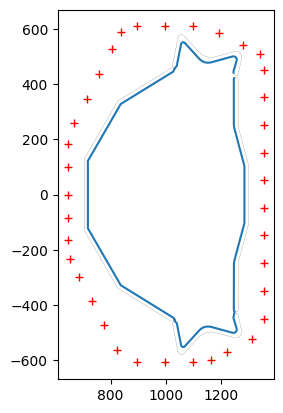

In [16]:
plt.plot( np.array(nsf_geom['div_upper'])[:,0],np.array(nsf_geom['div_upper'])[:,1], linewidth = .1, color = 'k') 
ind_div_u_1 = 16
ind_div_u_2 = 68


ind_in_1 = 24
ind_in_2 = 38

ind_div_l_1 = 45
ind_div_l_2 = 97

ind_out_1 = 26
ind_out_2 = 53
plt.scatter( np.array(nsf_geom['wall_inboard'])[ind_in_2,0],np.array(nsf_geom['wall_inboard'])[ind_in_2,1], s=.5, color= 'r') 

plt.plot( np.array(nsf_geom['div_lower'])[:,0],np.array(nsf_geom['div_lower'])[:,1], linewidth = .1, color = 'k') 
plt.plot( np.array(nsf_geom['wall_inboard'])[:,0],np.array(nsf_geom['wall_inboard'])[:,1], linewidth = .1, color = 'k') 
plt.plot( np.array(nsf_geom['wall_outboard'])[:,0],np.array(nsf_geom['wall_outboard'])[:,1], linewidth = .1, color = 'k') 
plt.gca().set_aspect(aspect = 1)

limiter = np.concatenate((np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,:], np.array(nsf_geom['wall_inboard'])[ind_in_1:ind_in_2,:], np.array(nsf_geom['div_lower'])[ind_div_l_1:ind_div_l_2,:], np.array(nsf_geom['wall_outboard'])[ind_out_1:ind_out_2,:]))

plt.plot(limiter[:,0], limiter[:,1])
#plt.plot(np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,0], np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,1])
#plt.plot(np.array(nsf_geom['wall_inboard'])[ind_in_2:ind_in_1,0], np.array(nsf_geom['wall_inboard'])[ind_in_2:ind_in_1,1])

array([1399.88354492, -279.31704712])


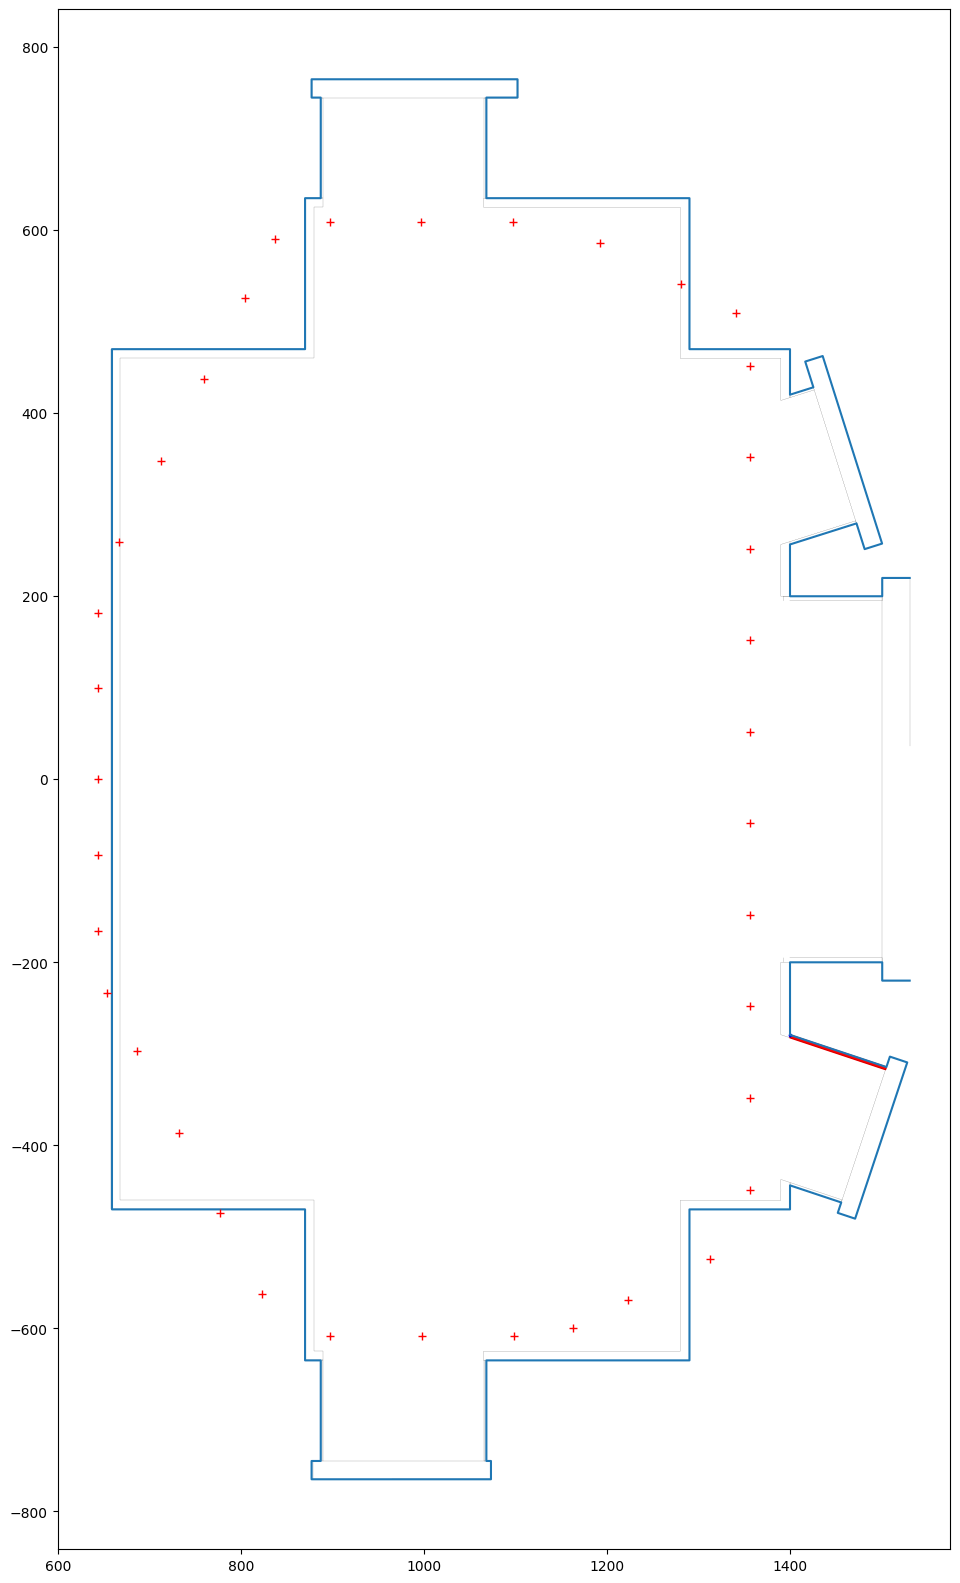

In [17]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect(aspect = 1)
vv_pts = []
for i in range(1,21):
    plt.plot(np.array(nsf_geom['vv_' + str(i)])[:,0],np.array(nsf_geom['vv_' + str(i)])[:,1], color = 'k', linewidth = .1 )


ind = 9
plt.fill(np.array(nsf_geom['vv_' + str(ind)])[:,0],np.array(nsf_geom['vv_' + str(ind)])[:,1], color = 'r' )

j = -4
pt = np.array(nsf_geom['vv_' + str(ind)])[j,:]
plt.scatter(pt[0],pt[1], color = 'b', s = 3)
print(repr(pt))

#14
vv_pts.append([1530.65148926,  220.        ])
vv_pts.append([1500.63879395,  220        ])
#12
vv_pts.append([1500.63879395,  200        ])
#3
vv_pts.append([1399.87316895,  200        ])
#16
vv_pts.append([1399.84533691,  256.60427856])
vv_pts.append([1472.52368164,  279.62091064])
#17
vv_pts.append([1481.43310547,  251.49797058])
vv_pts.append([1500.50280762,  257.53723145])
vv_pts.append([1435.56945801,  462.50097656])
vv_pts.append([1416.49975586,  456.46173096])
#15
vv_pts.append([1425.40930176,  428.33880615])
vv_pts.append([1399.84533691,  420.24295044])
#4
vv_pts.append([1399.87207031,  470        ])
vv_pts.append([1289.99987793,  470.00009155])
vv_pts.append([1289.99975586,  635        ])
#19
vv_pts.append([1068.09130859,  635        ])
vv_pts.append([1068.09130859,  744.92041016])
#20
vv_pts.append([1102.09423828,  744.92041016])
vv_pts.append([1102.09423828,  764.92041016])
vv_pts.append([877.07501221, 764.92041016])
vv_pts.append([877.07501221, 744.92041016])
#18
vv_pts.append([887.0758667 , 744.92041016])
vv_pts.append([887.0758667, 635       ])
#5
vv_pts.append([869.95117188, 635        ])
vv_pts.append([869.95117188, 470        ])
vv_pts.append([658.95697021, 470        ])


#bottom
vv_pts.append([658.95697021, -470        ])
vv_pts.append([869.95117188, -470        ])
vv_pts.append([869.95117188, -635        ])

vv_pts.append([887.0758667, -635       ])
vv_pts.append([887.0758667 , -744.92041016])

vv_pts.append([877.07501221, -744.92041016])
vv_pts.append([877.07501221, -764.92041016])

#8
vv_pts.append([1073.09191895, -764.92059326])
vv_pts.append([1073.09191895, -744.92059326])

#bottom
vv_pts.append([1068.09130859,  -744.92041016])
vv_pts.append([1068.09130859,  -635        ])

vv_pts.append([1289.99975586,  -635        ])
vv_pts.append([1289.99987793,  -470.00009155])
vv_pts.append([1399.87207031,  -470        ])

#10
vv_pts.append([1399.88354492, -443.76760864])
vv_pts.append([1455.8515625 , -462.43685913])
#11
vv_pts.append([1452.05419922, -473.82019043])
vv_pts.append([1471.02697754, -480.14892578])
vv_pts.append([1527.98706055, -309.39849854])
vv_pts.append([1509.01428223, -303.06976318])
#9
vv_pts.append([1505.21691895, -314.453125  ])
vv_pts.append([1399.88354492, -279.31704712])

#bottom
vv_pts.append([1399.87316895,  -200        ])
vv_pts.append([1500.63879395,  -200        ])

vv_pts.append([1500.63879395,  -220        ])
vv_pts.append([1530.65148926,  -220.        ])

vv_outer = np.array(vv_pts)
plt.plot(vv_outer[:,0], vv_outer[:,1])

plt.plot(tcam_locs[:,0]*1000,tcam_locs[:,1]*1000,'r+')

array([1389.88684082, -279.14501953])


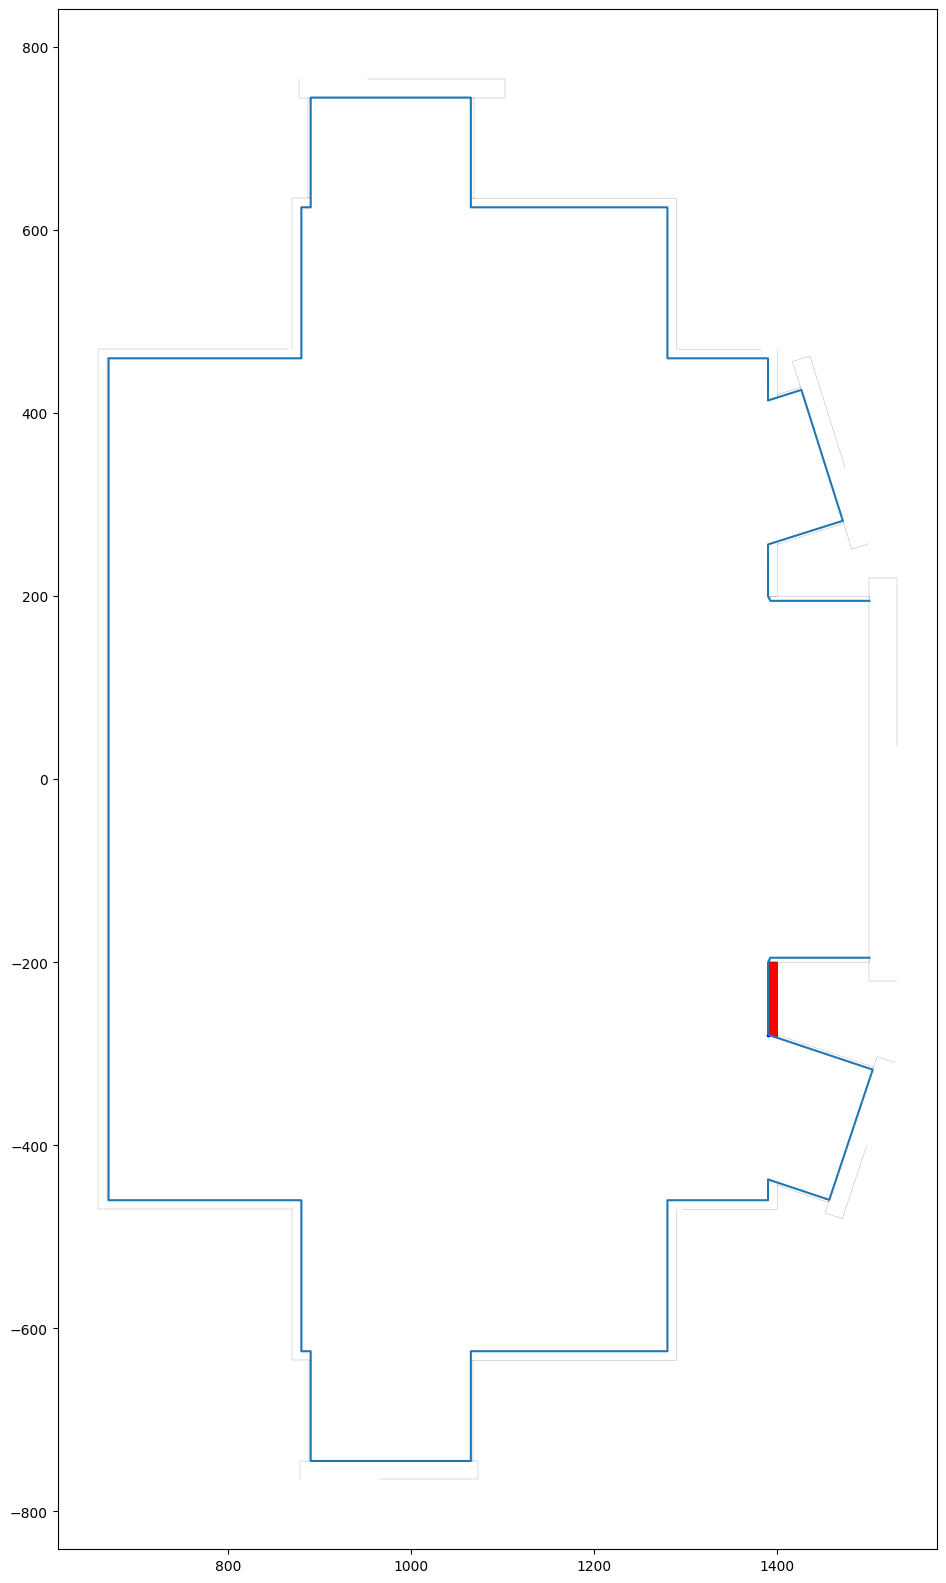

In [18]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect(aspect = 1)
vv_pts = []
for i in range(1,21):
    plt.plot(np.array(nsf_geom['vv_' + str(i)])[:,0],np.array(nsf_geom['vv_' + str(i)])[:,1], color = 'k', linewidth = .1 )


ind = 1
plt.fill(np.array(nsf_geom['vv_' + str(ind)])[:,0],np.array(nsf_geom['vv_' + str(ind)])[:,1], color = 'r' )

j = 4
pt = np.array(nsf_geom['vv_' + str(ind)])[j,:]
plt.scatter(pt[0],pt[1], color = 'b', s = 3)
print(repr(pt))

#14

#12
vv_pts.append([1500.63879395,  195        ])
vv_pts.append([1392.3737793,  195       ])

#3
vv_pts.append([1389.87475586,  200        ])
vv_pts.append([1389.85327148,  256.5866394 ])

#16
vv_pts.append([1471.61755371,  282.48086548])
#17
#15
vv_pts.append([1426.31530762,  425.47885132])
#4
vv_pts.append([1389.85327148,  413.93151855])
vv_pts.append([1389.87304688,  460.        ])
vv_pts.append([1279.95019531,  460.        ])
vv_pts.append([1279.95019531,  625.        ])
vv_pts.append([1065.09118652,  625.        ])
#19
vv_pts.append([1065.09106445,  744.92041016])
#20
#18
vv_pts.append([890.07617188, 744.92041016])
#5
vv_pts.append([890.07617188, 625.        ])
vv_pts.append([879.95056152, 625.        ])
vv_pts.append([879.95056152, 460.        ])
vv_pts.append([669.24145508, 460.        ])

#bottom
vv_pts.append([669.24145508, -460.        ])
vv_pts.append([879.95056152, -460.        ])
vv_pts.append([879.95056152, -625.        ])
vv_pts.append([890.07617188, -625.        ])

vv_pts.append([890.07617188, -744.92041016])

vv_pts.append([1065.09106445,  -744.92041016])

vv_pts.append([1065.09118652,  -625.        ])
vv_pts.append([1279.95019531,  -625.        ])
vv_pts.append([1279.95019531,  -460.        ])
vv_pts.append([1389.87304688,  -460.        ])

#2
vv_pts.append([1389.88684082, -437.27053833])
#10
vv_pts.append([1456.80090332, -459.59100342])
#9
vv_pts.append([1504.26757812, -317.29898071])
#1
vv_pts.append([1389.88684082, -279.14501953])
#bottom
vv_pts.append([1389.87475586,  -200        ])
vv_pts.append([1392.3737793,  -195       ])
vv_pts.append([1500.63879395,  -195        ])

vv_inner = np.array(vv_pts)


plt.plot(vv_inner[:,0], vv_inner[:,1])



In [83]:
# Create a G-S domain
gs_mesh = gs_Domain()
#gs_mesh = gs_Domain(zpad=[1.5,1.5])
# Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
# gs_mesh.define_region('vacuum',vac_dx,'vacuum')  # Define the vacuum inside the VV
# gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

# Define each of the PF coils
gs_mesh.define_region('CS_1',coil_dx,'coil')
gs_mesh.define_region('CS_2',coil_dx,'coil')
gs_mesh.define_region('CS_3',coil_dx,'coil')
gs_mesh.define_region('PF_1U',coil_dx,'coil')
gs_mesh.define_region('PF_1L',coil_dx,'coil')
gs_mesh.define_region('PF_2U',coil_dx,'coil')
gs_mesh.define_region('PF_2L',coil_dx,'coil')
gs_mesh.define_region('PF_3U',coil_dx,'coil')
gs_mesh.define_region('PF_3L',coil_dx,'coil')
gs_mesh.define_region('PF_4U',coil_dx,'coil')
gs_mesh.define_region('PF_4L',coil_dx,'coil')
gs_mesh.define_region('DIV_1U',coil_dx,'coil')
gs_mesh.define_region('DIV_1L',coil_dx,'coil')
gs_mesh.define_region('DIV_2U',coil_dx,'coil')
gs_mesh.define_region('DIV_2L',coil_dx,'coil')

# gs_mesh.define_region('DIV_U',coil_dx,'coil')
# gs_mesh.define_region('DIV_L',coil_dx,'coil')

# gs_mesh.define_region('in_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
# gs_mesh.define_region('out_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
# gs_mesh.define_region('in_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)
# gs_mesh.define_region('out_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)

for i in range(tcam_locs.shape[0]):
    gs_mesh.define_region('VV_{0}'.format(i+1),coil_dx,'coil')
    # plt.plot(tcam_locs[:,0]*1000,tcam_locs[:,1]*1000,'r+')


In [84]:
coils = {
    'CS_1':{'r': 0.58, 'z': 0.615, 'dr': 0.075,'dz': 0.43},
    'CS_2':{'r': 0.58, 'z': 0.0, 'dr': 0.075,'dz': 0.8},
    'CS_3':{'r': 0.58, 'z': -0.615, 'dr': 0.075,'dz': 0.43},

    'PF_1U':{'r': 0.738, 'z': 0.6, 'dr': 0.125,'dz': 0.125}, 
    'PF_2U':{'r': 1.2, 'z': 0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3U':{'r': 1.4, 'z': 0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4U':{'r': 1.95, 'z': 0.3, 'dr': 0.175,'dz': 0.175},

    'PF_1L':{'r': 0.738, 'z': -0.6, 'dr': 0.125,'dz': 0.125},
    'PF_2L':{'r': 1.2, 'z': -0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3L':{'r': 1.4, 'z': -0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4L':{'r': 1.95, 'z': -0.3, 'dr': 0.175,'dz': 0.175}
}

In [85]:
# Define geometry
gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='air')  # Define the shape of the limiter
# gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='vacuum')  # Define the shape of the limiter
# gs_mesh.add_annulus(vv_inner/1000, 'vacuum', vv_outer/1000, 'vv', parent_name = 'air')

# Define each of the PF coils
for key, val in coils.items():
    gs_mesh.add_rectangle(val['r'],val['z'],val['dr'],val['dz'],key,parent_name = 'air')


gs_mesh.add_polygon(np.array(nsf_geom['DIV1L'])/1000, 'DIV_1L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV1U'])/1000, 'DIV_1U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV2L'])/1000, 'DIV_2L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV2U'])/1000,'DIV_2U',parent_name = 'air')


# gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000,'in_lower_plate',parent_name='vacuum')
# gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000,'out_lower_plate',parent_name='vacuum')
# gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000,'in_upper_plate',parent_name='vacuum')
# gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000,'out_upper_plate',parent_name='vacuum')

for i in range(tcam_locs.shape[0]):
    gs_mesh.add_rectangle(tcam_locs[i,0],tcam_locs[i,1],tcam_locs[i,2]*0.7,tcam_locs[i,3],'VV_{0}'.format(i+1),parent_name = 'air',rot=(tcam_locs[i,4]-np.pi/2.0)*180.0/np.pi)
    # plt.plot(tcam_locs[:,0]*1000,tcam_locs[:,1]*1000,'r+')


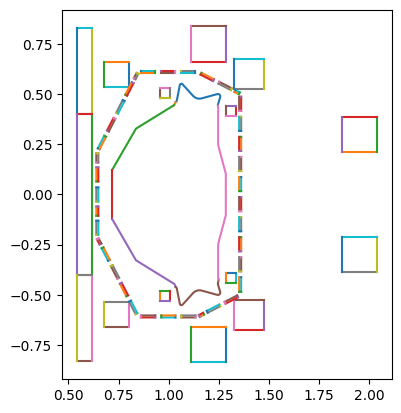

In [86]:
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

In [87]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 615
  # of unique segments  = 217
Generating mesh:
  # of points  = 3734
  # of cells   = 7350
  # of regions = 54


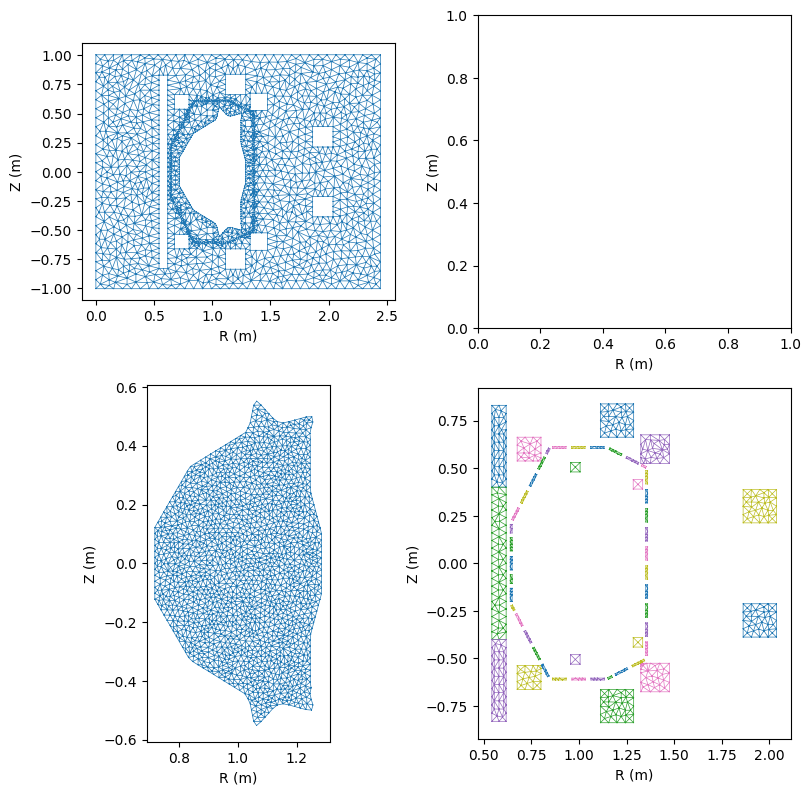

In [89]:
fig, ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
gs_mesh.plot_mesh(fig,ax,show_legends=False)

In [90]:
save_gs_mesh(mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict,'nextstep_mesh-dina.h5')